In [3]:
#imports
#numpy, pandas, scipy, math, mathplotlib
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#cross validation
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#data cleaned 
rawData = pd.read_csv('default of credit card clients1.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,-2,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,2,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,19131,2000,36681,10000,9000,689,679,0


In [5]:
#features
features = rawData.iloc[:,1:13]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,-2,0,0,689,0,0,0
1,120000,2,2,2,26,2,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,0,19131,2000,36681,10000,9000,689


In [6]:
#columns names
rawData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'],
      dtype='object')

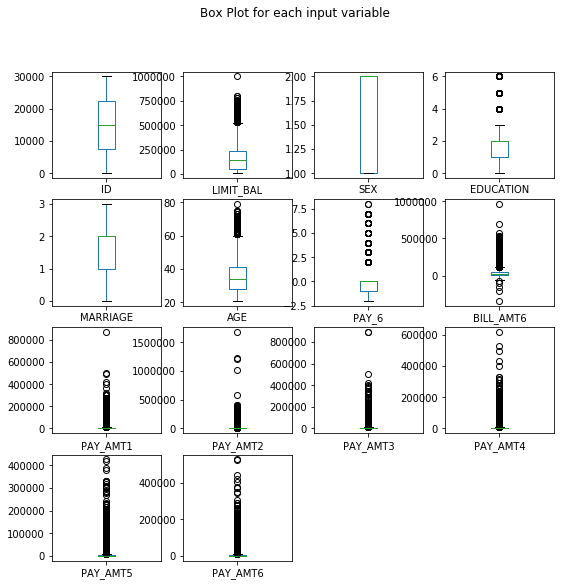

In [23]:
rawData.drop('default payment next month', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('Credit one')
plt.show()

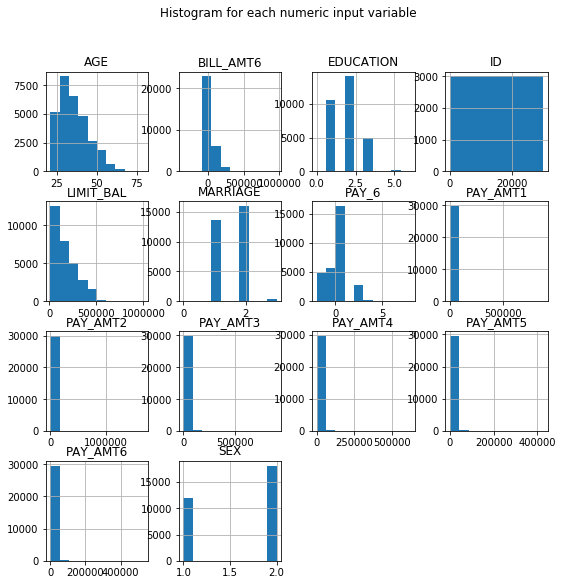

In [26]:
import pylab as pl
rawData.drop('default payment next month' ,axis=1).hist(bins=10, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Creditone-Hist')
plt.show()

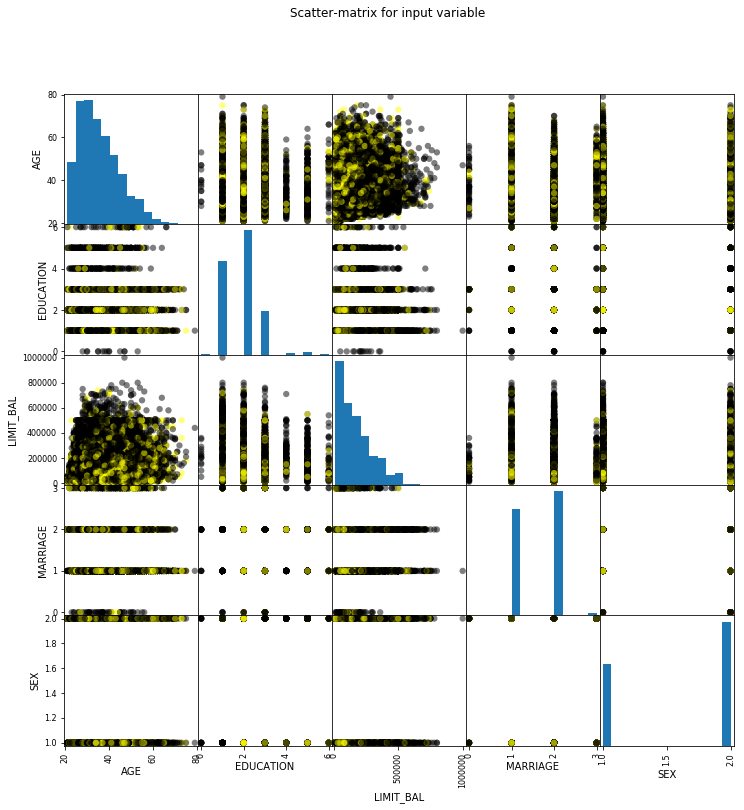

In [30]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['AGE', 'EDUCATION', 'LIMIT_BAL', 'MARRIAGE', 'SEX']
X = rawData[feature_names]
y = rawData['default payment next month']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)
plt.suptitle('Scatter-matrix for input variable')
plt.savefig('Creditone_scatter_matrix')

In [31]:
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.291100,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.149988,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [33]:
corrMat = rawData.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.009099   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.037456   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.030038   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.039943   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.038218   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.04

In [35]:
#dependent variable
depVar = rawData['default payment next month']

In [36]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [37]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,-2,0,0,689,0,0,0
1,120000,2,2,2,26,2,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,0,19131,2000,36681,10000,9000,689


In [38]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [39]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_6  BILL_AMT6  PAY_AMT1  \
29900      20000    1          2         2   29     -2          0         0   
29901      50000    1          2         2   29      0      49387         0   
29902     170000    1          3         2   30      0     124746    168096   
29903     260000    1          1         1   30     -1     172104     10018   
29904      60000    1          3         2   30      0      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0  
29901      6556      3250      1563      1208  
29902      6409      7335      4448      4519  
29903     13333        99        99    172104  
29904      4553      5800      2000      1000  


In [40]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [45]:
clf = DecisionTreeClassifier(min_impurity_decrease=2.0,min_samples_leaf=10, min_samples_split=20).fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=2.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on test set: 0.75


In [48]:
#Model Fitting
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clfpred = clf.predict(X_test)
print(confusion_matrix(y_test, clfpred))
print(classification_report(y_test, clfpred))

[[75  0]
 [25  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        75
          1       0.00      0.00      0.00        25

avg / total       0.56      0.75      0.64       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
logreg = LogisticRegression(C=2.0, max_iter=200, n_jobs=10)
logreg

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=10,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  " = {}.".format(self.n_jobs))


In [52]:
#Model Fitting
logregpred = logreg.predict(X_test)
print(confusion_matrix(y_test, logregpred))
print(classification_report(y_test, logregpred))

[[75  0]
 [25  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        75
          1       0.00      0.00      0.00        25

avg / total       0.56      0.75      0.64       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
knn = KNeighborsClassifier(leaf_size=50, n_jobs=12, n_neighbors=20)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=12, n_neighbors=20, p=2,
           weights='uniform')

In [57]:
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.75


In [58]:
#Model Fitting
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(classification_report(y_test, knnpred))

[[75  0]
 [25  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        75
          1       0.00      0.00      0.00        25

avg / total       0.56      0.75      0.64       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
svm = SVC(C=3.0, cache_size=200, coef0=0.05, degree=2,tol=0.003)
svm

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.05,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.003, verbose=False)

In [61]:
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.74


In [62]:
#Model Fitting
svmpred = logreg.predict(X_test)
print(confusion_matrix(y_test, svmpred))
print(classification_report(y_test, svmpred))

[[75  0]
 [25  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        75
          1       0.00      0.00      0.00        25

avg / total       0.56      0.75      0.64       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
#Make Predictions LOGREG
predictionslogreg = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on test set: 0.75


In [64]:
print (predictionslogreg)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [65]:
#Make Predictions KNN
predictionsknn = knn.predict(X_test)
print('Accuracy of knn regression classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of knn regression classifier on test set: 0.75


In [66]:
print(predictionsknn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [67]:
#Make Predictions SVM
predictionssvm = svm.predict(X_test)
print('Accuracy of Svm regression classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of Svm regression classifier on test set: 0.74


In [68]:
print(predictionssvm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


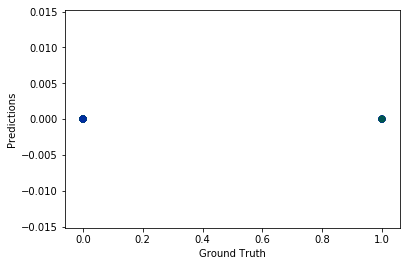

In [69]:
plt.scatter(y_test, predictionslogreg, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

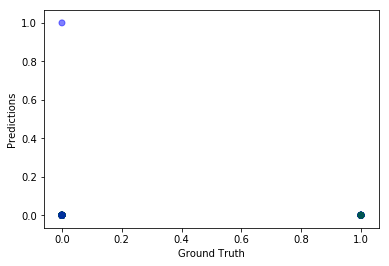

In [70]:
plt.scatter(y_test, predictionssvm, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();